# Study case: compare time related sales data

In this notebook we first generate sales data per businessday at several locations over two years. Then we merge the two years into one dataframe. We resample the data to monthly means by end of month frequencies. After that we display the data to compare the average month sales of the two years.


author Fenna Feenstra

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import numpy as np

## Pandas datetime

pandas stores timestamps using NumPy’s datetime64 data type at the nanosecond resolution. We can demonstrate this by creating a pandas series object with a data range in nanosecond frequency 

In [2]:
#pd.date_range?

In [3]:
#pd.Series(pd.date_range('2021-07-01', periods=3, freq='D')) # day
#pd.Series(pd.date_range('2021-07-01', periods=3, freq='H')) # hour
pd.Series(pd.date_range('2021-07-01', periods=3, freq='N')) # nanosecond

0   2021-07-01 00:00:00.000000000
1   2021-07-01 00:00:00.000000001
2   2021-07-01 00:00:00.000000002
dtype: datetime64[ns]

We see that the pandas series object is of the dtype `datetime64[ns]` (ns = nanoseconds)

## Create date_range

With date_range we can create all sorts of time intervals 
For example, if you wanted a date index containing the last business day of each month, you would pass the 'BM' frequency (business end of month)

In [4]:
dates = pd.date_range('1/1/2021', periods = 3, freq='BM')
pd.Series(dates)

0   2021-01-29
1   2021-02-26
2   2021-03-31
dtype: datetime64[ns]

Another example is a 2hour period

In [5]:
dates = pd.date_range('1/1/2021', periods = 3, freq='2h')
pd.Series(dates)

0   2021-01-01 00:00:00
1   2021-01-01 02:00:00
2   2021-01-01 04:00:00
dtype: datetime64[ns]

In the https://pandas.pydata.org/docs/reference/offset_frequency.html you can find more about frequencies and in the documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html you can read all the methods of this datetime object. 

## Create time related sales data

Let us create some time related data. The data represent sales per business days at several locations


In [6]:
N = 250 #there are about 250 business days in a year
locations=['Assen', 'Groningen', 'Hoogeveen']
dates20 = pd.date_range('1/1/2019', periods=N, freq='B')
sales20 = pd.DataFrame(np.random.randint(7,33 ,size=(N, len(locations))), index=dates20, columns = locations)
#print(sales20.head(3))
dates21 = pd.date_range('1/1/2020', periods=N, freq='B')
sales21 = pd.DataFrame(np.random.randint(10,40 ,size=(N, len(locations))), index=dates21, columns = locations)
#print(sales21.head(3))
#concatenate the two dataframes
sales = pd.concat([sales20, sales21])

In [7]:
sales.head(2)

,Assen,Groningen,Hoogeveen
2019-01-01,26,25,31
2019-01-02,29,29,10


In [8]:
sales.tail(2)

,Assen,Groningen,Hoogeveen
2020-12-14,30,11,32
2020-12-15,25,14,27


In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2019-01-01 to 2020-12-15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Assen      500 non-null    int64
 1   Groningen  500 non-null    int64
 2   Hoogeveen  500 non-null    int64
dtypes: int64(3)
memory usage: 15.6 KB


In [10]:
sales.describe().T #returns descriptive stats (transposed)

,count,mean,std,min,25%,50%,75%,max
Assen,500.0,22.166,8.018418,7.0,15.0,22.0,29.0,39.0
Groningen,500.0,22.094,8.287009,7.0,16.0,21.0,29.0,39.0
Hoogeveen,500.0,21.578,8.045457,7.0,15.0,21.0,28.0,39.0


## Plot the sales data
We can plot the data just by calling `pandas.DataFrame.plot()`

<IPython.core.display.Javascript object>


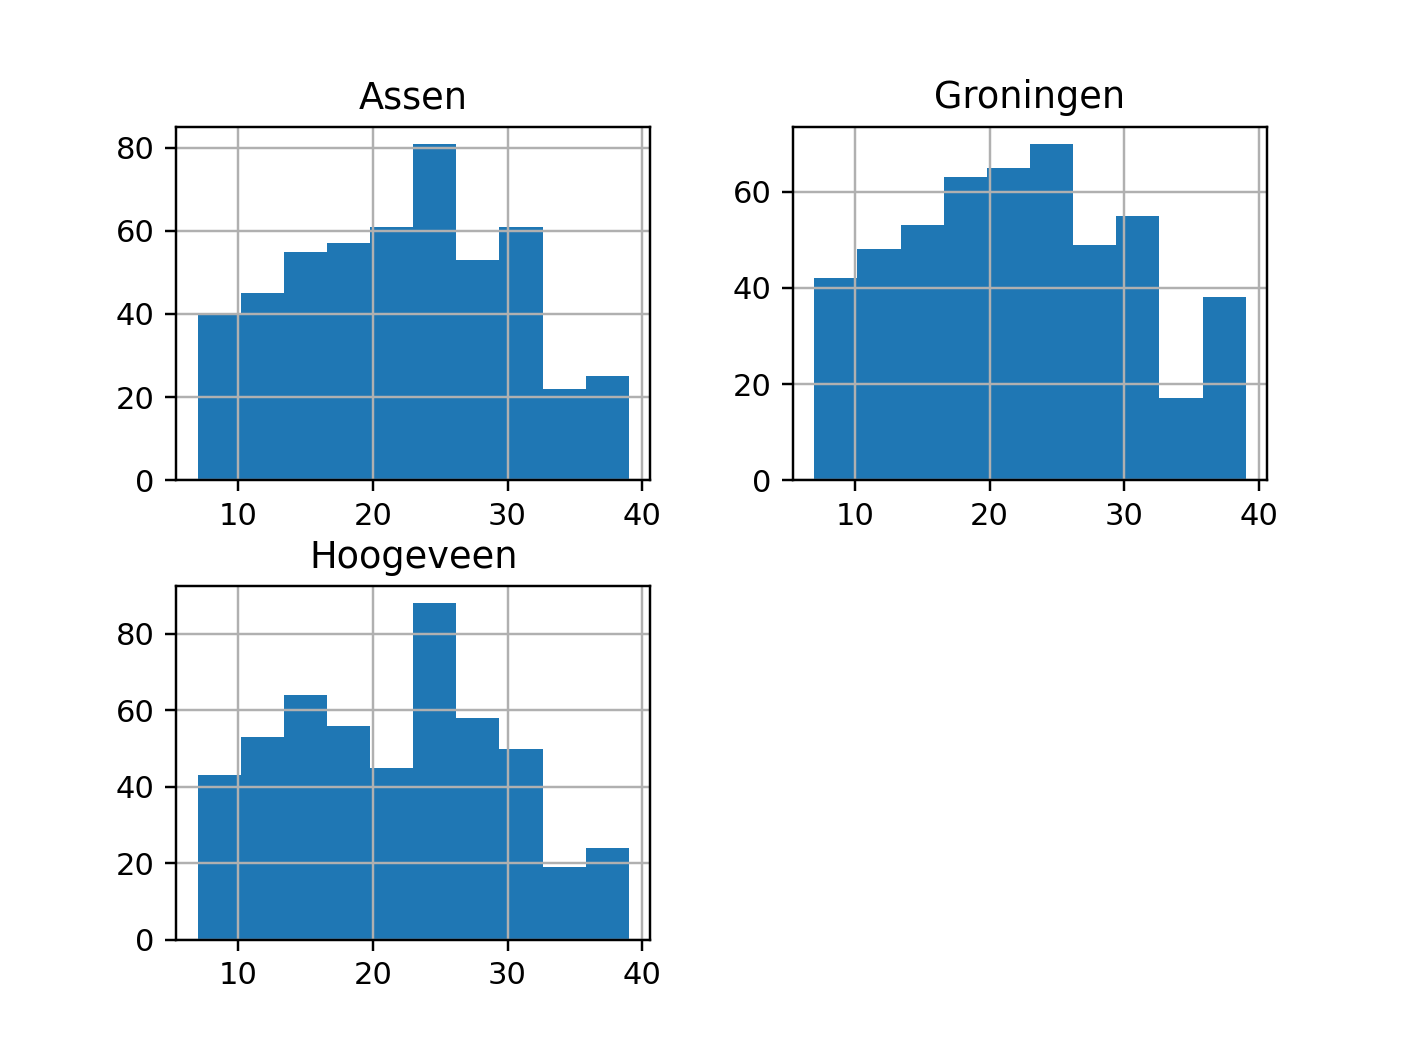

array([[<AxesSubplot:title={'center':'Assen'}>,
        <AxesSubplot:title={'center':'Groningen'}>],
       [<AxesSubplot:title={'center':'Hoogeveen'}>, <AxesSubplot:>]],
      dtype=object)

In [11]:
sales.hist()

<IPython.core.display.Javascript object>


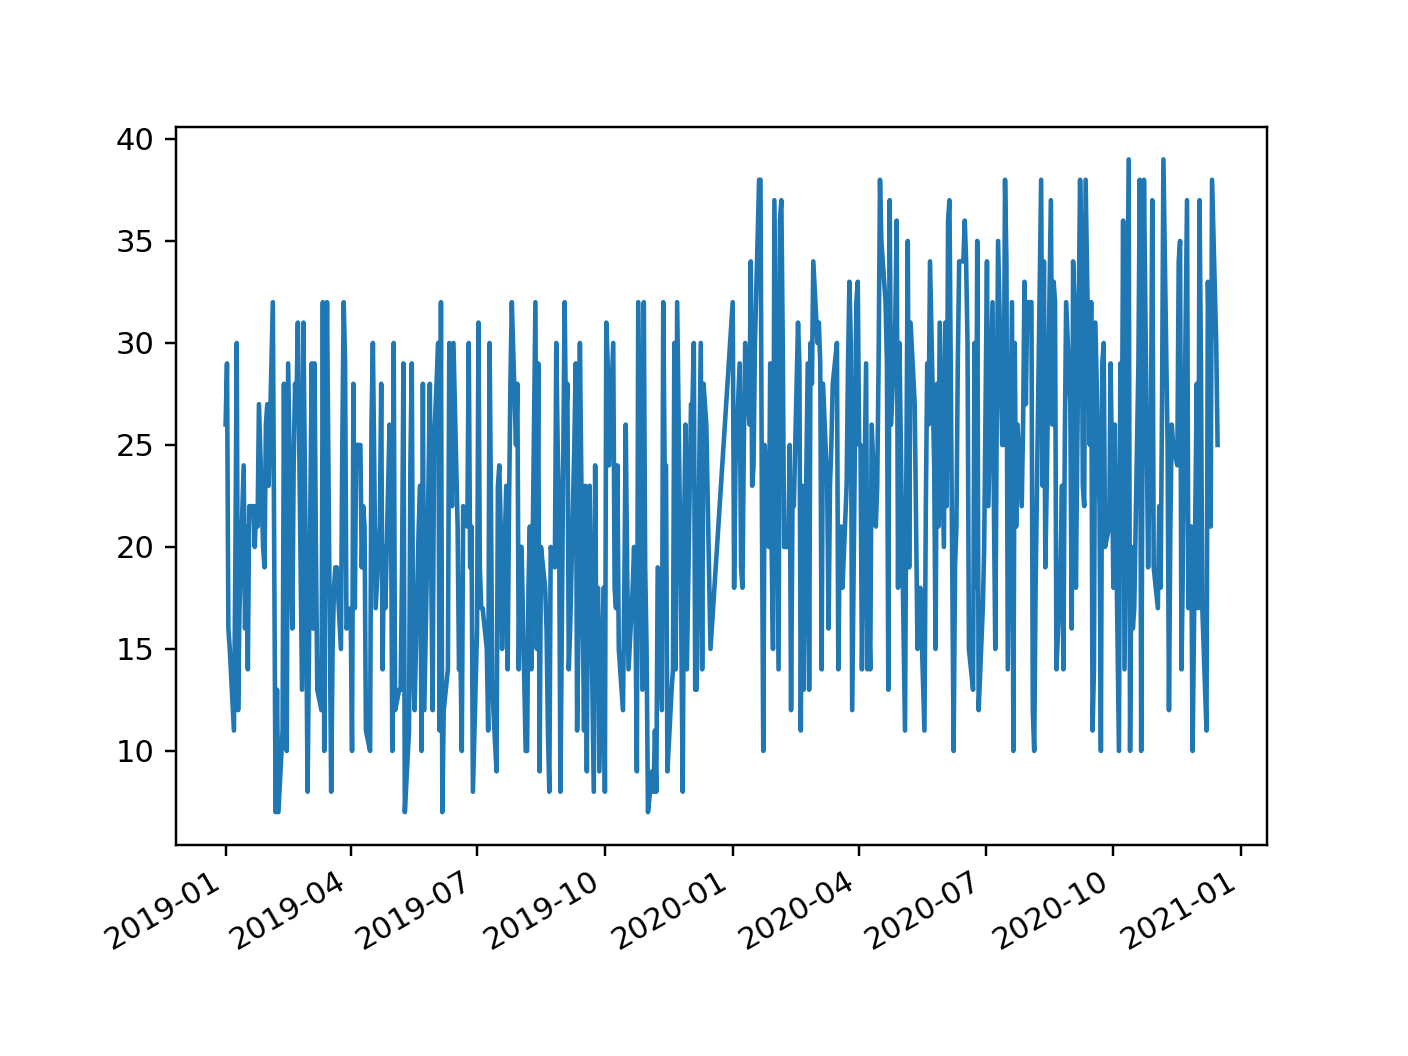

<AxesSubplot:>

In [12]:
#plot the sales of Assen
plt.figure()
sales['Assen'].plot()

## Resample

This data is not readable. We should consider Resampling. Resampling is necessary when you’re given a data set recorded in some time interval and you want to change the time interval to something else. For example, aggregate daily numbers into monthly numbers. The syntax 

    <DataFrame or Series>.resample(arguments).<aggregate function>

In [13]:
month_sales = sales.resample('M').sum() #create a dataframe with the total sales per month
month_sales.tail()

,Assen,Groningen,Hoogeveen
2020-08-31,514,543,507
2020-09-30,554,548,524
2020-10-31,524,568,540
2020-11-30,492,473,514
2020-12-31,287,223,243


In [14]:
year_sales = sales.resample('Y').sum()
year_sales.describe()

,Assen,Groningen,Hoogeveen
count,2.000000,2.0000,2.000000
mean,5541.500000,5523.5000,5394.500000
std,908.632214,740.3408,828.022041
min,4899.000000,5000.0000,4809.000000
25%,5220.250000,5261.7500,5101.750000
50%,5541.500000,5523.5000,5394.500000
75%,5862.750000,5785.2500,5687.250000
max,6184.000000,6047.0000,5980.000000


<IPython.core.display.Javascript object>


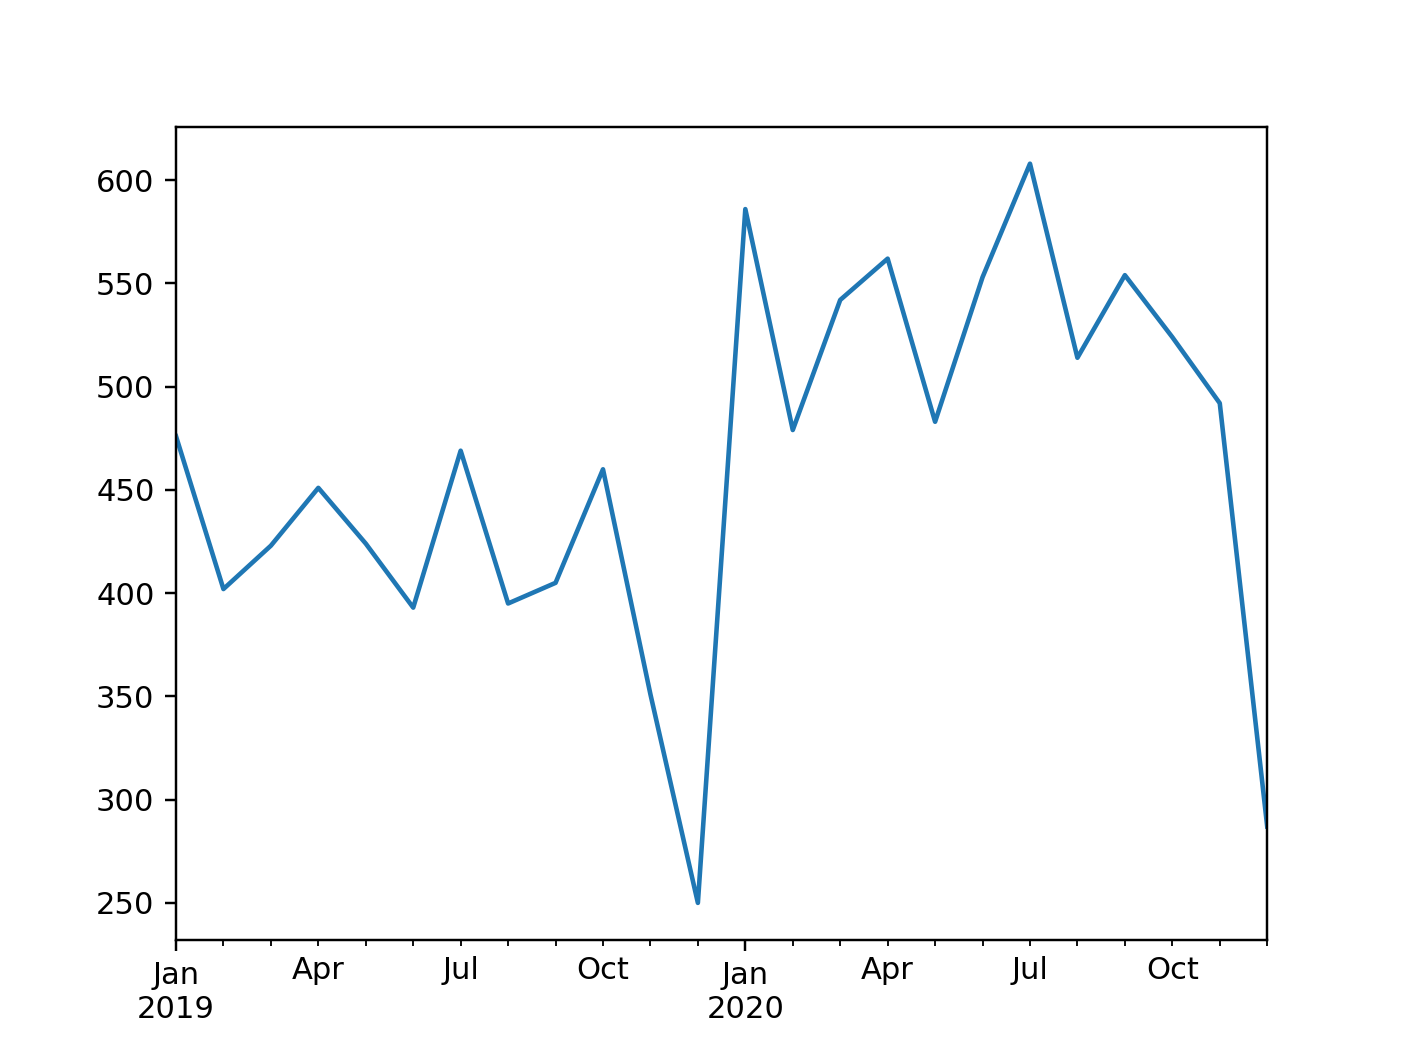

<AxesSubplot:>

In [15]:
plt.figure()
month_sales['Assen'].plot()

We can also resample to evaluate a part of the dataset. For instance we could get the mean value of Assen en Hoogeveen combined

In [16]:
# get mean of Drenthe sales
month_sales_drenthe = sales.resample('M').mean().eval('Assen+Hoogeveen')
print(month_sales_drenthe.head())
#create a dataframe from the series
msd = pd.DataFrame({'date':month_sales_drenthe.index, 'average':month_sales_drenthe.values}).set_index('date')
print(msd.head())

2019-01-31    40.521739
2019-02-28    38.650000
2019-03-31    38.047619
2019-04-30    39.772727
2019-05-31    35.739130
Freq: M, dtype: float64
              average
date                 
2019-01-31  40.521739
2019-02-28  38.650000
2019-03-31  38.047619
2019-04-30  39.772727
2019-05-31  35.739130


<IPython.core.display.Javascript object>


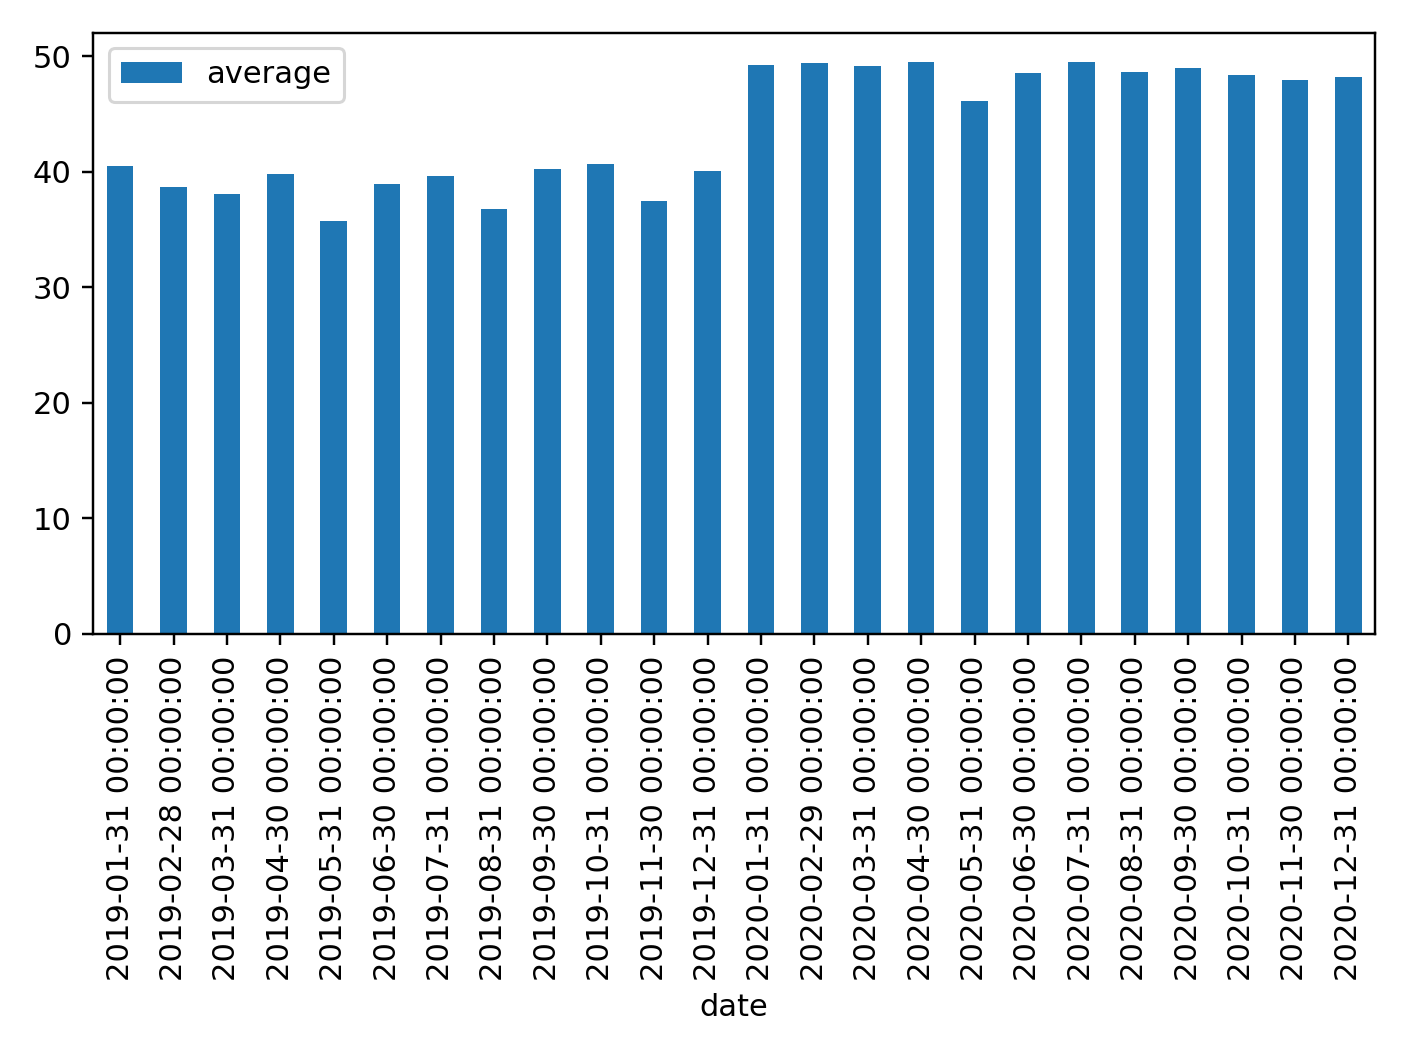

In [17]:
msd.plot(kind = 'bar')
plt.tight_layout()

## Locators and Formatters

This is not the kind of plot we want. Remember we can access the objects of the figure. The two relevant classes are Locators and Formatters. Locators determine where the ticks are, and formatters control the formatting of tick labels.

In [18]:
from matplotlib.dates import MonthLocator, YearLocator, DateFormatter

<IPython.core.display.Javascript object>


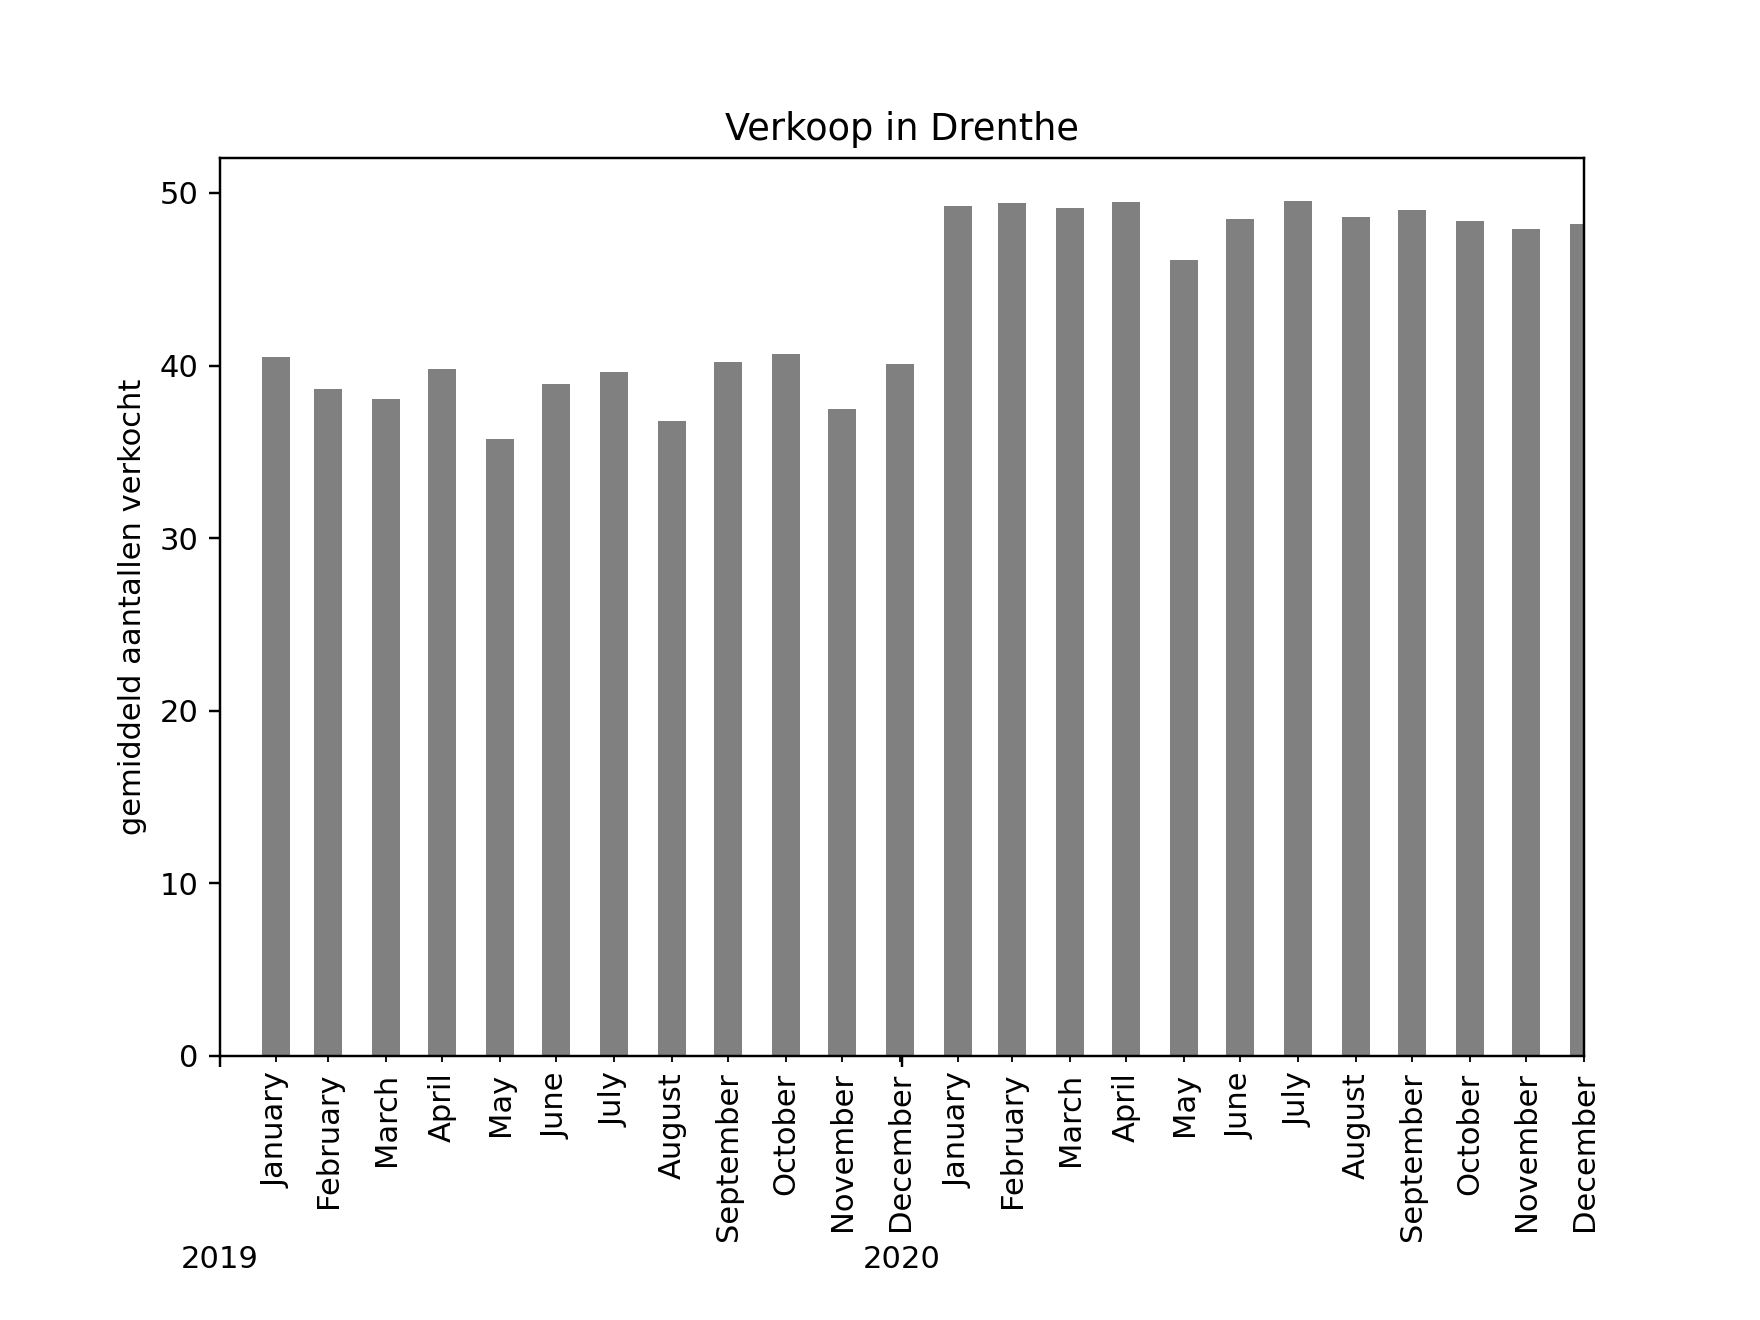

In [19]:
plt.figure(figsize=(8, 6))
#ax = plt.gca(), figure = plt.gcf()

#adjust titles and labels
plt.title('Verkoop in Drenthe')
plt.ylabel('gemiddeld aantallen verkocht')

#adjust thick labels
plt.gca().xaxis.set_minor_formatter(DateFormatter('%B')) #display name of month
plt.gca().xaxis.set_minor_locator(MonthLocator(interval=1, bymonthday=-1)) #every months end of month
plt.gca().xaxis.set_major_formatter(DateFormatter('\n\n\n\n\n%Y')) #display year
plt.gca().xaxis.set_major_locator(YearLocator()) 
#plot
plt.bar(x = msd.index, height = msd['average'], width = 15, color = 'grey')
# adjust limit
plt.gca().set_xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2020-12-31'))
# auto rotate
plt.gcf().autofmt_xdate(rotation=90, which = 'minor', ha="center")
plt.show()

However, we want to compare the different dates over the year per year. Let's pivot the table

In [20]:
msd = msd.reset_index().rename(columns={'date':'date_end'})
msd['year'] = msd.date_end.dt.year
msd['month'] = msd.date_end.dt.month
print(msd.head())
df_sales = msd.pivot(index='month', columns='year', values='average')
df_sales

    date_end    average  year  month
0 2019-01-31  40.521739  2019      1
1 2019-02-28  38.650000  2019      2
2 2019-03-31  38.047619  2019      3
3 2019-04-30  39.772727  2019      4
4 2019-05-31  35.739130  2019      5


year,2019,2020
month,,
1,40.521739,49.260870
2,38.650000,49.400000
3,38.047619,49.136364
4,39.772727,49.500000
5,35.739130,46.095238
6,38.950000,48.500000
7,39.652174,49.521739
8,36.772727,48.619048
9,40.190476,49.000000


In [21]:
#reset index to get tidy table
df_sales = df_sales.reset_index()
print(df_sales.columns)

Index(['month', 2019, 2020], dtype='object', name='year')


In [22]:
df_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
month,12.0,6.500000,3.605551,1.000000,3.750000,6.500000,9.250000,12.000000
2019,12.0,38.876322,1.579402,35.739130,37.904762,39.301087,40.115801,40.652174
2020,12.0,48.623623,0.961799,46.095238,48.318182,48.809524,49.295652,49.521739


In [23]:
#change numbers to month name
def format_months(i):
    l = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return l[i-1]

df_sales['month'] = df_sales['month'].apply(format_months)
print(df_sales.head(3))


year month       2019       2020
0      Jan  40.521739  49.260870
1      Feb  38.650000  49.400000
2      Mar  38.047619  49.136364


<IPython.core.display.Javascript object>


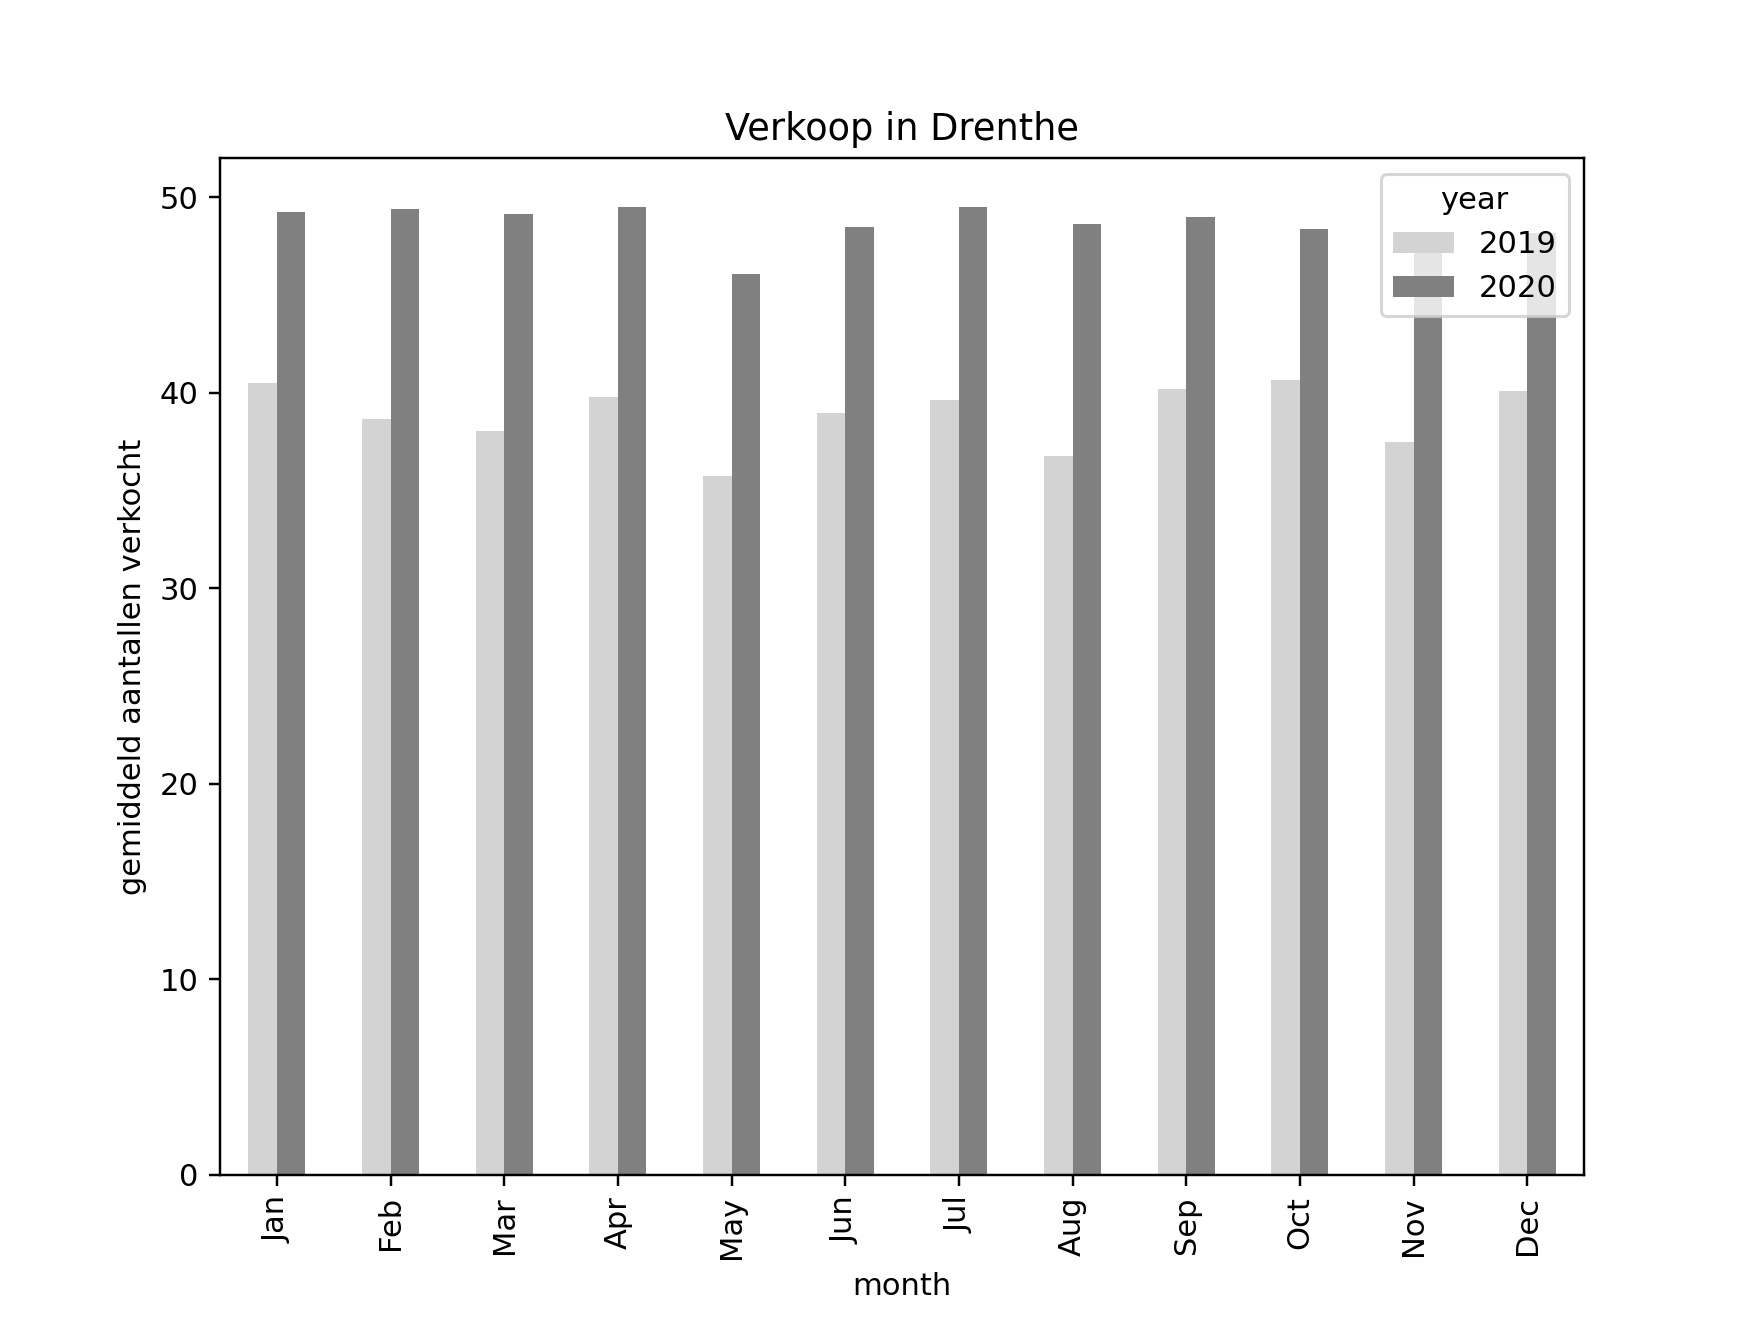

<AxesSubplot:title={'center':'Verkoop in Drenthe'}, xlabel='month', ylabel='gemiddeld aantallen verkocht'>

In [24]:
df_sales.plot(x = 'month', 
              y=[2019, 2020], 
              kind = 'bar', 
              color = ['lightgrey', 'grey'], 
              ylabel='gemiddeld aantallen verkocht', 
              title='Verkoop in Drenthe', 
              figsize=(8, 6))